# Read CSVs

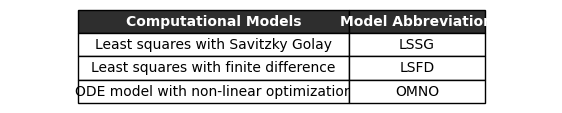

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

model_data_folder = '/Users/lalit/Desktop/self/Uni/MS Project Thesis/codebase/hr-power-reln-app/src/services/MATLAB Model data/'

file_name_labels = {
    'Connor Swift.csv' : 'PA',
    'Robert Gesink.csv' : 'PB',
    'Michal Kwiatkowski.csv' : 'PC',
    'Ralph Dowdell.csv' : 'AA',
    'Constantin Bartels.csv' : 'AB',
    'Theo Arvanitakis.csv' : 'AC'
}

all_results_df = {} 

for file_name, label in file_name_labels.items():
    model_results_file_path = os.path.join(model_data_folder, file_name) 
    results_df = pd.read_csv(model_results_file_path) 
    all_results_df[label] = results_df


data = {
    'Computational Models': ['Least squares with Savitzky Golay',  'Least squares with finite difference', 'ODE model with non-linear optimization'],
    'Model Abbreviation': ['LSSG','LSFD','OMNO']
}
cell_text = [[data['Computational Models'][i], data['Model Abbreviation'][i]] for i in range(len(data['Computational Models']))]

fig, ax = plt.subplots(figsize=(7, 0.3))
ax.axis('off')

# Create the table row by row
table = ax.table(cellText=cell_text,
                 colLabels=list(data.keys()),
                 colWidths=[0.5] + [0.25],
                 loc='center')

# Style the header with dark grey background
header_cells = table.get_celld()
for (i, j), cell in header_cells.items():
    if i == 0:
        cell.set_text_props(weight='bold', color='white')  # Bold white text
        cell.set_facecolor('#2E2E2E')  # Dark grey background

cell_dict = table.get_celld()
for key, cell in cell_dict.items():
    cell.set_text_props(va='center', ha='center')
    
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.4)

plt.show()

# Boxplot

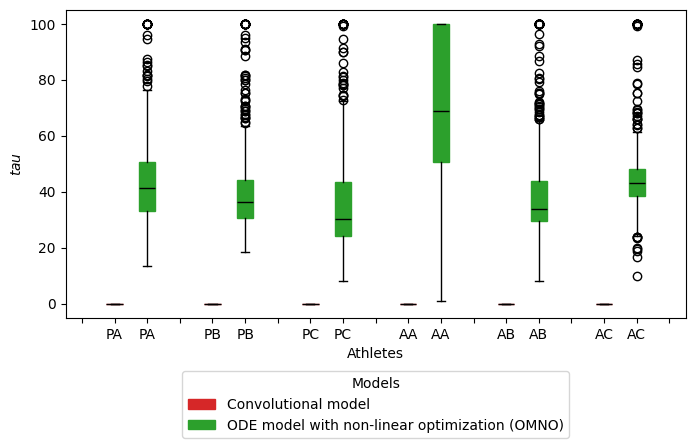

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Set this to 0 if you want to make comparison of ODE models else set to 1 if you want to make comparison of fmincon vs Convolutional model
option = 1  
param = 'tau'

ode_models = ['ls_sgol','ls_fdiff','fmincon']
all_models = ['ls_sgol','ls_fdiff','fmincon','convo']

ode_conv_models = ['convo','fmincon']

method_labels = {
    'ls_sgol': 'Least squares with Savitzky Golay (LSSG)',
    'ls_fdiff': 'Least squares with finite difference (LSFD)',
    'fmincon': 'ODE model with non-linear optimization (OMNO)',
    'convo': 'Convolutional model'
}


method_colors = {
    'ls_fdiff': 'tab:blue',
    'ls_sgol': 'tab:orange',
    'fmincon': 'tab:green',
    'convo': 'tab:red'
}
fig, ax = plt.subplots(figsize=(8, 4))
athlete_labels = []
all_r2_values = []
legends = []

models = ode_models if option == 0 else ode_conv_models
all_r2_values.append(([], 'none'))
athlete_labels.append('')
for file_name, df in all_results_df.items():
    curr_athlete_label = file_name
    for model in models:
        curr_model_df = df[df['Approach'] == model]
        r2_values = curr_model_df['Tau'].tolist()
        smallest_finite_value = -0.1
        r2_values = [smallest_finite_value if value < 0.0 else value for value in r2_values]
        all_r2_values.append((r2_values, method_colors[model]))
        athlete_labels.append(curr_athlete_label)
    all_r2_values.append(([], 'none'))
    athlete_labels.append('')
    
boxplot_parts = ax.boxplot([r2 for r2, _ in all_r2_values], patch_artist=True)

for idx, item in enumerate(all_r2_values):
    box_color = item[1]
    plt.setp(boxplot_parts['boxes'][idx], color=box_color)   
    plt.setp(boxplot_parts['medians'][idx], color='black')

#ax.set_xticks(np.arange(1, len(all_results_df) * (len(all_models) + 1), len(all_models) + 1))
ax.set_xticklabels(athlete_labels, rotation=0, ha='center')
ax.set_xlabel('Athletes')
ax.set_ylabel(r'$tau$', fontweight='normal')
legend_handles = [Patch(color=method_colors[model], label=method_labels[model]) for model in models]

plt.legend(handles=legend_handles, title='Models', bbox_to_anchor=(0.5, -0.15), loc='upper center')

plt.show()

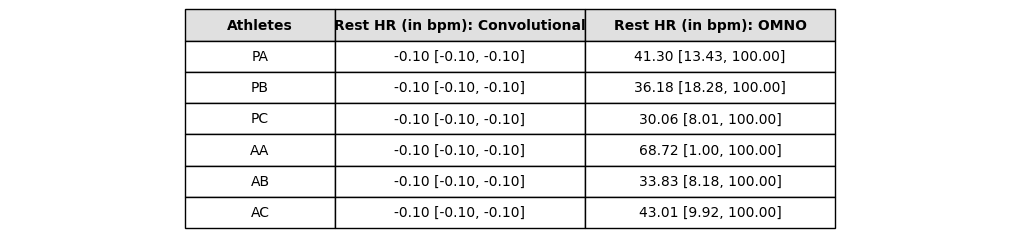

In [3]:
tau_values = [r2 for r2 in all_r2_values if r2[0]]
unique_athlete_labels = list(set(filter(None, athlete_labels)))
table_data = []
for i, athlete in enumerate(unique_athlete_labels): 
    row_data = [] 
    tau_indices = [((i*2) + j) for j in range(len(models))]
    for index in tau_indices: 
        tau_list = tau_values[index][0]
        median = np.median(tau_list)
        min_value = np.min(tau_list)
        max_value = np.max(tau_list)
        row_data.append(f'{median:.2f} [{min_value:.2f}, {max_value:.2f}]')
    table_data.append(row_data)

fig, ax = plt.subplots(figsize=(10, 1))
ax.axis('off')
plt.subplots_adjust(left=-1.0, right=0.0, top=0.9, bottom=0.1)

model_names = {
    'ls_sgol': 'LSSG',
    'ls_fdiff': 'LSFD',
    'fmincon': 'OMNO',
    'convo': 'Convolutional'
}

new_col_labels = ['Athletes'] + [f'Rest HR (in bpm): {model_names.get(model, model)}' for model in models]
athlete_entries = ['PA', 'PB', 'PC', 'AA', 'AB', 'AC']
table_data_with_athletes = []
for idx, athlete in enumerate(athlete_entries):
    table_data_with_athletes.append([athlete] + table_data[idx])

table = ax.table(cellText=table_data_with_athletes,
                 colLabels=new_col_labels,
                 colWidths=[0.15] + [0.25] * (len(table_data) - 1),
                 loc='center',
                 cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
 
header_cells = table.get_celld()
for (i, j), cell in header_cells.items():
    if i == 0:
        cell.set_text_props(weight='bold', color='black')
        cell.set_facecolor('#e0e0e0')

plt.subplots_adjust(left=-6, right=-5, top=1, bottom=0)  # Adjust subplot parameters to remove padding

plt.show()


# paired t-test

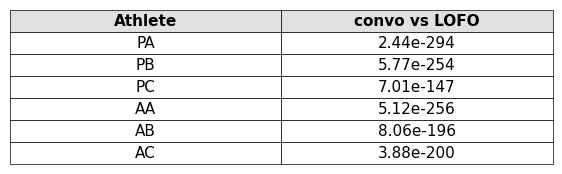

In [5]:
from scipy.stats import ttest_rel
from itertools import combinations

athlete_comp_values = {athlete: {model: [] for model in models} for athlete in all_results_df.keys()}
attribute_name = 'Tau'
for file_name, df in all_results_df.items():
    athlete = file_name
    activity_ids = df['Activity_ID'].unique()
    for activity_id in activity_ids:
        negative_r2_found = False
        for model in models:
            if 'convo' in models and 'convo' == model:
                attribute_name = 'Mode'
                neg_activity_filter_mode= df[(df['Approach'] == 'convo') & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                neg_activity_filter_tau = df[(df['Approach'] == 'fmincon') & (df['Activity_ID'] == activity_id)]['Tau'].tolist()
                neg_activity_filter = neg_activity_filter_tau + neg_activity_filter_mode
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            elif 'convo' in models and 'fmincon'== model:
                attribute_name = 'Tau'
                neg_activity_filter_tau = df[(df['Approach'] == 'fmincon') & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                neg_activity_filter_mode = df[(df['Approach'] == 'convo') & (df['Activity_ID'] == activity_id)]['Mode'].tolist()
                neg_activity_filter = neg_activity_filter_tau + neg_activity_filter_mode
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            else:
                attribute_name = 'Tau'
                neg_activity_filter = df[(df['Approach'].isin(models)) & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
                if any(val < 0 for val in neg_activity_filter):
                    negative_r2_found = True
                    break
            p_filter_values = df[(df['Approach'] == model) & (df['Activity_ID'] == activity_id)][attribute_name].tolist()
            athlete_comp_values[athlete][model].extend(p_filter_values)

p_values = {}

for athlete, model_values in athlete_comp_values.items():
    for model1, model2 in combinations(model_values.keys(), 2):
        values1 = model_values[model1]
        values2 = model_values[model2]
        t_stat, p_val = ttest_rel(values1, values2)
        if 0 < p_val < 0.01:  
            formatted_p_val = "{:.2e}".format(p_val)
        else:
            formatted_p_val = "{:.2f}".format(p_val) 
        p_values[(athlete, model1, model2)] = formatted_p_val
print()



fig, ax = plt.subplots(figsize=(7, 2))
ax.axis('off')
models_replaced = ['LOFO' if model == 'fmincon' else 'LSFD' if model == 'ls_fdiff' else 'LSSG' if model == 'ls_sgol' else model for model in models]

table_data = [['Athlete'] + [f'{model1} vs {model2}' for model1, model2 in combinations(models_replaced, 2)]]

for athlete in athlete_comp_values.keys():
    row = [athlete] + [p_values.get((athlete, model1, model2), '') for model1, model2 in combinations(models, 2)]
    table_data.append(row)

table = ax.table(cellText=table_data, loc='center', cellLoc='center', colWidths=[0.3] + [0.3] * (len(table_data[0]) - 1),
                 bbox=[0, 0, 1, 1], edges='closed')  

table.auto_set_font_size(False)
table.set_fontsize(11)

for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_facecolor('#e0e0e0')
        cell.set_text_props(weight='bold')
        
for key, cell in table.get_celld().items():
    cell.set_linewidth(0.5)  

plt.show()


In [21]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import mplcursors
from pandas.core.window import rolling
import plotly.graph_objects as go
from mpl_interactions import ioff, panhandler, zoom_factory
%matplotlib widget
from matplotlib.widgets import RectangleSelector
def calculate_tau(sigma, mode):
    result = np.exp(sigma**2 + norm.ppf(0.63) * sigma + np.log(mode))
    return round(result, 2)
    
for key, df in all_results_df.items():
    previous_tau = 0
    for index, row in df.iterrows():
        if row['Approach'] == 'convo':
            tau_value = calculate_tau(row['Sigma'], row['Mode'])
            all_results_df[key].loc[index, 'Tau'] = tau_value
            previous_tau = tau_value


file_name_labels = {
    'Connor Swift.csv' : 'PA',
    'Robert Gesink.csv' : 'PB',
    'Michal Kwiatkowski.csv' : 'PC',
    'Ralph Dowdell.csv' : 'AA',
    'Constantin Bartels.csv' : 'AB',
    'Theo Arvanitakis.csv' : 'AC'
}


def moving_average(data, window_size):
    smoothed_data = []
    for i in range(len(data)):
        start_date = data.iloc[i]['Date'] - pd.Timedelta(days=window_size)
        end_date = data.iloc[i]['Date']
        window_data = data[(data['Date'] > start_date) & (data['Date'] <= end_date)]['Tau']

        smoothed_value = window_data.median()
        smoothed_data.append(smoothed_value)
    return smoothed_data

for file_name, df in all_results_df.items():
    convo_df = df[df['Approach'] == 'convo'].copy()
    convo_df = convo_df[(convo_df['R2'] >= 0.70) & (convo_df['Tau'] < 100)]
    convo_df['Date'] = pd.to_datetime(convo_df['Activity_Date'])
    convo_df = convo_df.sort_values(by='Date')
    convo_df['Smoothed_Tau'] = convo_df['Tau'] #moving_average(convo_df, window_size=1)

    fmincon_df = df[df['Approach'] == 'fmincon'].copy()
    fmincon_df = fmincon_df[(fmincon_df['R2'] >= 0.70) &
                        (fmincon_df['Tau'] > 10) & (fmincon_df['Tau'] < 100) &
                        (fmincon_df['Rest'] >= 30) & (fmincon_df['Rest'] < 150) &
                        (fmincon_df['Gain'] >= 0.05) & (fmincon_df['Gain'] <= 1.0)]
    fmincon_df['Date'] = pd.to_datetime(fmincon_df['Activity_Date'])
    fmincon_df = fmincon_df.sort_values(by='Date')
    fmincon_df['Smoothed_Tau'] = fmincon_df['Tau']#moving_average(fmincon_df, window_size=1)
 

    plt.plot(convo_df['Date'], convo_df['Smoothed_Tau'], marker='s', markersize=1, color='r', linestyle='-', label='Convolutional')
    plt.plot(fmincon_df['Date'], fmincon_df['Smoothed_Tau'], marker='o', markersize=1, color='b', linestyle='-', label='OMNO')
    convo_df_filtered = convo_df[(convo_df['Date'] >= '2021-01-01') & (convo_df['Date'] <= '2023-12-31')]
    fmincon_df_filtered = fmincon_df[(fmincon_df['Date'] >= '2021-01-01') & (fmincon_df['Date'] <= '2023-12-31')]
    
    plt.xlabel('Activity Month', fontweight='bold')
    plt.ylabel('tau (in s)', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend()
    convo_trace = go.Scatter(
        x=convo_df_filtered['Date'],
        y=convo_df_filtered['Smoothed_Tau'],
        mode='lines+markers',
        name='Convolutional',
        marker=dict(color='red', size=5),
        line=dict(width=2),
        text=[f"Date: {date.strftime('%Y-%m-%d')}<br>Smoothed Tau: {tau}"
              for date, tau in zip(convo_df_filtered['Date'], convo_df_filtered['Smoothed_Tau'])],
        hoverinfo='text'
    )

    fmincon_trace = go.Scatter(
    x=fmincon_df_filtered['Date'],
    y=fmincon_df_filtered['Smoothed_Tau'],
    mode='lines+markers',
    name='OMNO',
    marker=dict(color='green', size=5),
    line=dict(width=2),
    text=[f"Date: {date.strftime('%Y-%m-%d')}<br>Tau: {tau}"
          for date, tau in zip(fmincon_df_filtered['Date'], fmincon_df_filtered['Smoothed_Tau'])],
    hoverinfo='text'
    )

    layout = go.Layout(
    xaxis_title='Activity Month',
    yaxis_title='tau (in s)',
    xaxis_tickformat="%b %Y",  
    xaxis=dict(
        range=['2022-09-01', '2023-12-31']  
    ),
    height=600,
    width=600,
        legend=dict(
            x=0.25,
            y=1.2, 
            orientation="h",  
            font=dict(
                color="black"  
            )
        ),
        font=dict(
            family="Arial, sans-serif",   
            size=14,  
            color="black"   
        ),
        hoverlabel=dict(
            font=dict(
                family="Arial, sans-serif",  
                size=12,  
                color="white"  
            )
        )
    )

    fig = go.Figure(data=[fmincon_trace], layout=layout)

    fig.show()


/var/folders/p2/qz1nhdlx4nd3qx96hzl9v3qw0000gp/T/ipykernel_28379/1992566451.py:11: RuntimeWarning:

overflow encountered in exp



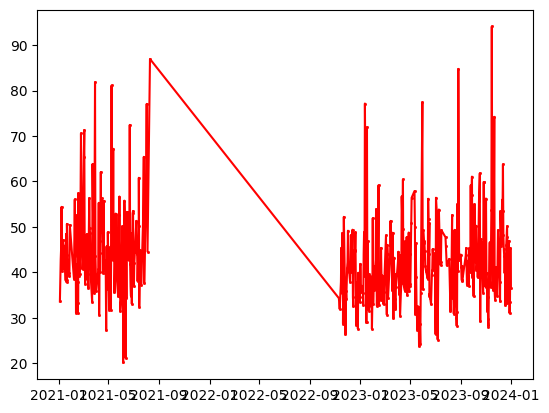

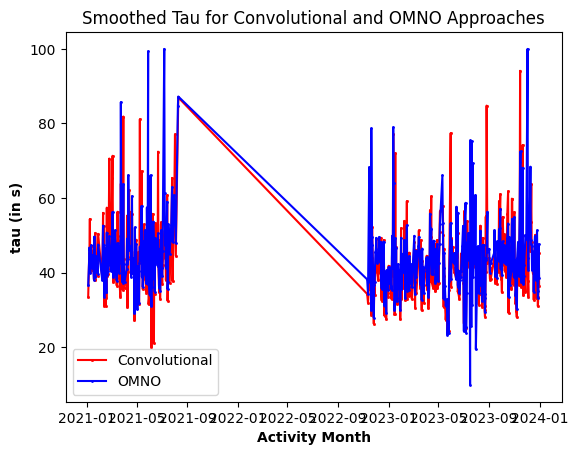

In [28]:
from mpl_interactions import ioff, panhandler, zoom_factory


ioff()

# Your data
x1 = convo_df_filtered['Date']
y1 = convo_df_filtered['Smoothed_Tau']
x2 = fmincon_df_filtered['Date']
y2 = fmincon_df_filtered['Smoothed_Tau']

# Plot the data
fig, ax = plt.subplots()
ax.plot(x1, y1, marker='s', markersize=1, color='r', linestyle='-', label='Convolutional')
ax.plot(x2, y2, marker='o', markersize=1, color='b', linestyle='-', label='OMNO')

# Customize the plot
ax.set_xlabel('Activity Month', fontweight='bold')
ax.set_ylabel('tau (in s)', fontweight='bold')
ax.set_title('Smoothed Tau for Convolutional and OMNO Approaches')

# Add legend
ax.legend()

# Add panning and zooming functionality
panhandler(fig)

# Add zoom functionality
zoom_factory(ax)

# Show the plot
plt.show()